In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

<h4>Linear Regression Overview</h4>
<ul>
<li>Linear Model. Estimated Target = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the weight and x is the feature
</li>
<li>Predicted Value: Numeric</li>
<li>Algorithm Used: Linear Regression. Objective is to find the weights w</li>
<li>Optimization: Stochastic Gradient Descent. Seeks to minimize loss/cost so that predicted value is as close to actual as possible</li>
<li>Cost/Loss Calculation: Squared loss function</li>
</ul>

In [2]:
def straight_line(x):
    return 5*x + 8

In [3]:
def straight_line_weight(weight1,x):
    return weight1*x + 8

In [4]:
np.random.seed(5)
x_vals = pd.Series(np.random.rand(150)*20)
y_vals = x_vals.map(straight_line)

In [ ]:
#x_vals

In [5]:
df = pd.DataFrame({'x1':x_vals,'y':y_vals})

In [6]:
# One Feature example
# Training Set - Contains several examples of feature 'x' and corresponding correct answer 'y'
# Objective is to find out the form y = w0 + w1*x1
df.head()

,x1,y
0,4.439863,30.199317
1,17.414646,95.073231
2,4.134383,28.671916
3,18.372218,99.861091
4,9.768224,56.841119


In [ ]:
df.tail()

Text(0.5,1,'Training Set - One Feature')

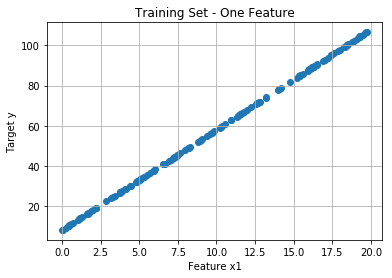

In [7]:
plt.scatter(x=x_vals,y=y_vals)
plt.xlabel('Feature x1')
plt.ylabel('Target y')
plt.grid(True)
plt.title('Training Set - One Feature')

<h4>Try with different values for W1</h4>
Assume that w0 = 8. We need to find out optimal value for w1.
Let's try different weights and compute target attribute y

In [8]:
weights = [3,4,5,6,7]
y_at_weight = {}

for w1 in weights:    
    y_calculated = []
    y_at_weight[w1] = y_calculated
    for x in x_vals:
        y_calculated.append(straight_line_weight(w1,x))

In [ ]:
#y_calculated

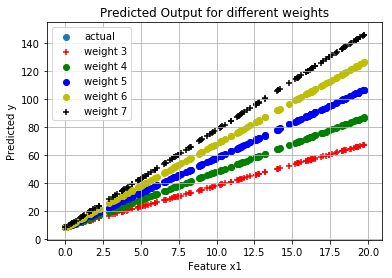

In [11]:
plt.scatter(x=x_vals,y=y_vals, label='actual')
plt.scatter(x = x_vals, y = y_at_weight[3], color='r', marker='+', label = 'weight 3')
plt.scatter(x = x_vals, y = y_at_weight[4], color='g', label = 'weight 4')
plt.scatter(x = x_vals, y = y_at_weight[5], color='b', label = 'weight 5')
plt.scatter(x = x_vals, y = y_at_weight[6], color='y', label = 'weight 6')
plt.scatter(x = x_vals, y = y_at_weight[7], color='k', marker='+', label = 'weight 7')
plt.xlabel('Feature x1')
plt.ylabel('Predicted y')
plt.title('Predicted Output for different weights')
plt.grid(True)
plt.legend()

<h4>Plot Loss at different Weights w1</h4>

In [ ]:
# For a set of weights, let's find out loss or cost
weight = pd.Series(np.linspace(3,7,100))

In [ ]:
weight.head()

In [ ]:
weight.tail()

In [ ]:
# Cost/Loss Calculation: Squared loss function...a measure of how far is predicted value from actual
# Steps :
#  For every weight and feature x, compute predicted y
#  Now find out loss by = average ((predicted y - actual y)**2)
loss_at_wt = []
for w1 in weight:
    y_predicted = []
    for x in x_vals:
        y_predicted.append(straight_line_weight(w1,x))
    
    loss_at_wt.append(((y_vals - y_predicted)**2).mean())

In [ ]:
plt.scatter(x=weight, y=loss_at_wt)
plt.grid(True)
plt.xlabel('Weight for feature 1')
plt.ylabel('Loss')
plt.title('Loss Curve - Loss at different weight')

<h4>Loss Function</h4>
Squared Loss Function. Loss is the average of squared difference between predicted and actual value.  Squared Loss function not only gives us Loss at a given weight, it also tells us which direction 
to go to minimize loss. <br>
For a given (weight, loss), algorithm finds the slope using calculus/first order derivatives. 
If negative slope, increase the weight
If positive slope, decrease the weight

<h4>Learning Rate</h4>
Learning Rate decides how much the weight should be increased or decreased.<br>
Too big of a change, it will skip the point where loss is minimal.<br>
Too small of a change, it will take several iterations to find out where the loss is minimal.<br>


<h4>Quadratic Example with two features</h4>

In [ ]:
# Let's look at a quadratic example: y = x**2 + x + c
# two features: x**2 and x

In [ ]:
def quad_func (x):
    return 25*x**2 -80*x + 64

In [ ]:
def quad_func_weight(weight2, x):
    #For different weights of quadratic term
    # Acutal eqn. 25x^2 - 80x + 64.  We have fixed w1=-80,w0=64. need to find w2.
    return weight2*x**2 -80*x + 64

In [ ]:
# Quadratic
np.random.seed(5)
x_vals = pd.Series(np.random.rand(150)*20)
y_vals = x_vals.map(quad_func)

In [ ]:
plt.scatter(x=x_vals,y=y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Set - Two Features')
plt.grid(True)

In [ ]:
weights = [0,20,30,50]
y_at_weight = {}

for w1 in weights:    
    y_calculated = []
    y_at_weight[w1] = y_calculated
    
    for x in x_vals:
        y_calculated.append(quad_func_weight(w1,x))

In [ ]:
plt.scatter(x=x_vals,y=y_vals, label='actual')
plt.scatter(x=x_vals,y=y_at_weight[0], label='weight 0', color='r')
plt.scatter(x=x_vals,y=y_at_weight[20], label='weight 20', color='g')
plt.scatter(x=x_vals,y=y_at_weight[30], label='weight 30', color='k')
plt.scatter(x=x_vals,y=y_at_weight[50], label='weight 50', color='y')
plt.xlabel('x')
plt.ylabel('Predicted y')
plt.title('Predicted Output for different weights')
plt.grid(True)
plt.legend()

In [ ]:
# Initialize Weights for feature 2 
weight = pd.Series(np.linspace(-20,70,200))
loss_at_wt = []
for w1 in weight:
    y_calculated = []
    for x in x_vals:
        y_calculated.append(quad_func_weight(w1,x))
    
    loss_at_wt.append(((y_vals - y_calculated)**2).mean())

In [ ]:
plt.scatter(x=weight, y=loss_at_wt)
plt.grid(True)
plt.xlabel('Weight for feature 2')
plt.ylabel('Loss')
plt.title('Loss Curve - Loss at different weight')

<h4>Summary</h4>
<p><b>Squared Loss Function</b> is parabolic in nature. It has an important property of not only telling us the loss at a given weight, but also tells us which way to go to minimize loss</p>
<p><b>Gradient Descent</b> optimization alogrithm uses loss function to move the weights of all the features and iteratively adjusts the weights until optimal value is reached</p>

<p><b>Batch Gradient Descent</b> predicts y value for all training examples and then adjusts the value of weights based on loss. It can converge much slower when training set is very large. Training set order does not matter as every single example in the training set is considered before making adjustments</p>

<p><b>Stochastic Gradient Descent</b> predicts y value for next training example and immediately adjusts the value of weights.</p> It can converge faster when training set is very large.  Training set should be random order otherwise model will not learn correctly. 